In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | dno
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | roanoke rapids
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | porto belo
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | tual
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | monrovia
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | churapcha

Processing Record 37 of Set 4 | geraldton
Processing Record 38 of Set 4 | balakhta
Processing Record 39 of Set 4 | redditch
Processing Record 40 of Set 4 | machali
Processing Record 41 of Set 4 | pleasant point
Processing Record 42 of Set 4 | gamba
Processing Record 43 of Set 4 | sola
Processing Record 44 of Set 4 | chaplygin
Processing Record 45 of Set 4 | santiago
Processing Record 46 of Set 4 | cefalu
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | te anau
Processing Record 49 of Set 4 | luderitz
Processing Record 50 of Set 4 | port hardy
Processing Record 1 of Set 5 | eldikan
City not found. Skipping...
Processing Record 2 of Set 5 | bosaso
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | yuancheng
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | baiyin
Processing Record 8 of Set 5 | coahuayana
Processing Record 9 of Set 5 | lavrentiya
Processing Record 

Processing Record 25 of Set 8 | yuryevets
Processing Record 26 of Set 8 | komsomolskiy
Processing Record 27 of Set 8 | cape canaveral
Processing Record 28 of Set 8 | sabha
Processing Record 29 of Set 8 | murray bridge
Processing Record 30 of Set 8 | muros
Processing Record 31 of Set 8 | kaitangata
Processing Record 32 of Set 8 | isangel
Processing Record 33 of Set 8 | zhuhai
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | victoria point
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | katobu
Processing Record 38 of Set 8 | beringovskiy
Processing Record 39 of Set 8 | sulangan
Processing Record 40 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 8 | meulaboh
Processing Record 42 of Set 8 | san joaquin
Processing Record 43 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 44 of Set 8 | cumnock
Processing Record 45 of Set 8 | kusk
City not found. Skipping...
Processing Record 46 of Set 8 | 

Processing Record 15 of Set 12 | guiratinga
Processing Record 16 of Set 12 | kushmurun
Processing Record 17 of Set 12 | gresham
Processing Record 18 of Set 12 | evensk
Processing Record 19 of Set 12 | mankono
Processing Record 20 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 12 | verkhoyansk
Processing Record 22 of Set 12 | statesville
Processing Record 23 of Set 12 | polunochnoye
Processing Record 24 of Set 12 | mikkeli
Processing Record 25 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 26 of Set 12 | biltine
Processing Record 27 of Set 12 | tasiilaq
Processing Record 28 of Set 12 | prigorodka
Processing Record 29 of Set 12 | qui nhon
Processing Record 30 of Set 12 | akdagmadeni
Processing Record 31 of Set 12 | madang
Processing Record 32 of Set 12 | van buren
Processing Record 33 of Set 12 | kampene
Processing Record 34 of Set 12 | lamego
Processing Record 35 of Set 12 | sechura
Processing Record 36 of Set 12 | pingliang
Process

In [13]:
len(cities)

591

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,81.16,81,54,7.31,PG,2022-01-24 17:52:29
1,Dno,57.8277,29.9637,24.46,90,52,10.89,RU,2022-01-24 17:52:30
2,Albany,42.6001,-73.9662,26.47,56,16,1.86,US,2022-01-24 17:48:13
3,Roanoke Rapids,36.4615,-77.6542,48.45,61,0,0.00,US,2022-01-24 17:52:30
4,Mount Gambier,-37.8333,140.7667,66.11,72,98,8.05,AU,2022-01-24 17:52:31
5,Atuona,-9.8000,-139.0333,78.37,74,6,17.60,PF,2022-01-24 17:52:31
6,Punta Arenas,-53.1500,-70.9167,60.91,48,96,44.87,CL,2022-01-24 17:48:16
7,Barrow,71.2906,-156.7887,8.62,78,90,28.77,US,2022-01-24 17:52:32
8,Alofi,-19.0595,-169.9187,71.49,94,40,1.14,NU,2022-01-24 17:52:32
9,Porto Belo,-27.1578,-48.5531,92.62,71,47,11.92,BR,2022-01-24 17:52:33


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df=city_data_df[new_column_order]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2022-01-24 17:52:29,-2.0226,147.2712,81.16,81,54,7.31
1,Dno,RU,2022-01-24 17:52:30,57.8277,29.9637,24.46,90,52,10.89
2,Albany,US,2022-01-24 17:48:13,42.6001,-73.9662,26.47,56,16,1.86
3,Roanoke Rapids,US,2022-01-24 17:52:30,36.4615,-77.6542,48.45,61,0,0.00
4,Mount Gambier,AU,2022-01-24 17:52:31,-37.8333,140.7667,66.11,72,98,8.05
5,Atuona,PF,2022-01-24 17:52:31,-9.8000,-139.0333,78.37,74,6,17.60
6,Punta Arenas,CL,2022-01-24 17:48:16,-53.1500,-70.9167,60.91,48,96,44.87
7,Barrow,US,2022-01-24 17:52:32,71.2906,-156.7887,8.62,78,90,28.77
8,Alofi,NU,2022-01-24 17:52:32,-19.0595,-169.9187,71.49,94,40,1.14
9,Porto Belo,BR,2022-01-24 17:52:33,-27.1578,-48.5531,92.62,71,47,11.92


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

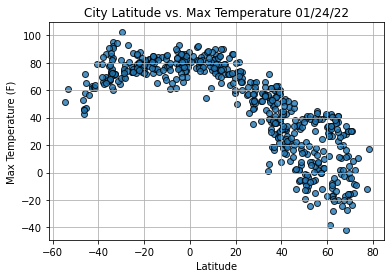

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

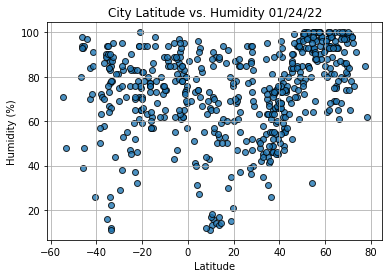

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

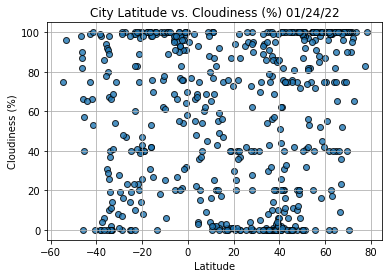

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

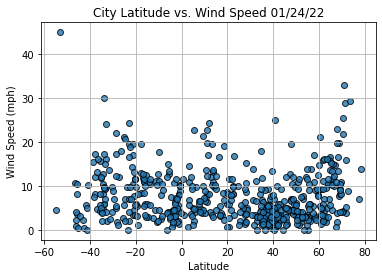

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Dno,RU,2022-01-24 17:52:30,57.8277,29.9637,24.46,90,52,10.89
2,Albany,US,2022-01-24 17:48:13,42.6001,-73.9662,26.47,56,16,1.86
3,Roanoke Rapids,US,2022-01-24 17:52:30,36.4615,-77.6542,48.45,61,0,0.00
7,Barrow,US,2022-01-24 17:52:32,71.2906,-156.7887,8.62,78,90,28.77
17,Guerrero Negro,MX,2022-01-24 17:52:36,27.9769,-114.0611,65.30,47,0,8.61


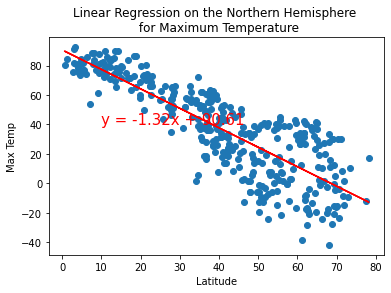

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [48]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

LinregressResult(slope=-1.3221173129628805, intercept=90.60705103765596, rvalue=-0.831912034506467, pvalue=1.2868945691918867e-94, stderr=0.046350979725086054, intercept_stderr=2.0939127122373784)

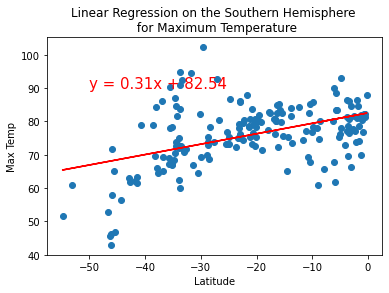

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [49]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

LinregressResult(slope=0.3126003558691979, intercept=82.54063755789085, rvalue=0.4571607495782391, pvalue=9.844148115943866e-11, stderr=0.04545517873195647, intercept_stderr=1.1556419472481283)

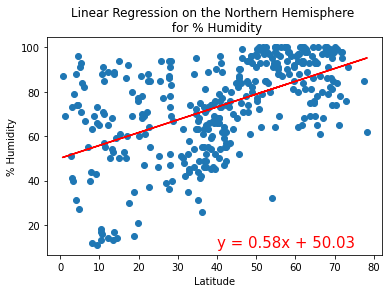

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [50]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

LinregressResult(slope=0.5770965076930048, intercept=50.02855000370867, rvalue=0.5350019391582579, pvalue=2.4287169620250793e-28, stderr=0.047898161046000046, intercept_stderr=2.1638068688488006)

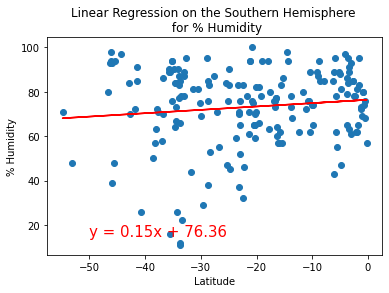

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [51]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

LinregressResult(slope=0.15169256029985903, intercept=76.35982779345005, rvalue=0.11723299995616986, pvalue=0.11601871894969212, stderr=0.0960467800666542, intercept_stderr=2.44187111434912)

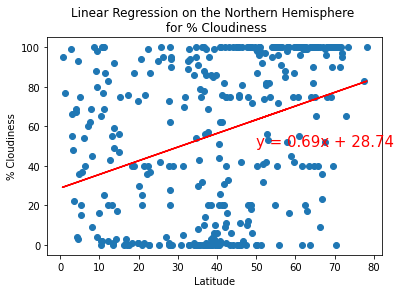

In [57]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(50,50))

In [58]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

LinregressResult(slope=0.6919712295760596, intercept=28.73500888698498, rvalue=0.3437330551019071, pvalue=1.5624363506581455e-11, stderr=0.09935945942206932, intercept_stderr=4.488579020311499)

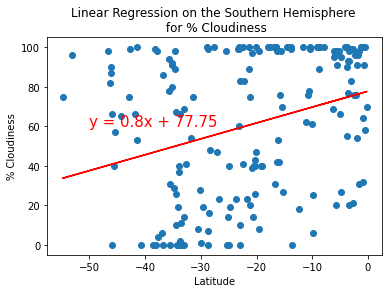

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [59]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

LinregressResult(slope=0.8036206707894424, intercept=77.753748688115, rvalue=0.30227723473295404, pvalue=3.5385104417054946e-05, stderr=0.18941410406576956, intercept_stderr=4.815620357575128)

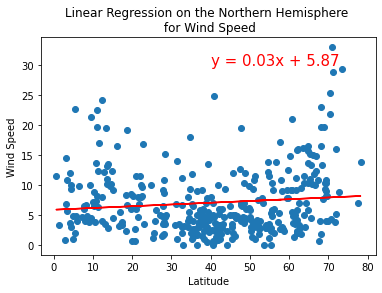

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

In [62]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

LinregressResult(slope=0.02914207964189318, intercept=5.867723867490526, rvalue=0.10323899133686865, pvalue=0.04904944359401702, stderr=0.0147569179435304, intercept_stderr=0.6666460613922828)

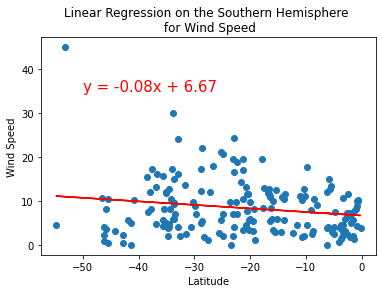

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [66]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

LinregressResult(slope=-0.08048474828769875, intercept=6.6690182811136385, rvalue=-0.17997080381129268, pvalue=0.01533736959775743, stderr=0.032880264819618046, intercept_stderr=0.83594024536227)